In [2]:
import pywt
def print_array(arr):
    print "[%s]" % ", ".join(["%.14f" % x for x in arr])

# for family in pywt.families():
#     print "%s family:" % family, ', '.join(pywt.wavelist(family))
   
print pywt.Wavelet('db5') 
print_array(pywt.Wavelet('db5').dec_lo)

Wavelet db5
  Family name:    Daubechies
  Short name:     db
  Filters length: 10
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
[0.00333572528500, -0.01258075199902, -0.00624149021301, 0.07757149384007, -0.03224486958503, -0.24229488706619, 0.13842814590110, 0.72430852843857, 0.60382926979747, 0.16010239797413]


In [3]:
ecg = [-86, -87, -87, -89, -89, -90, -91, -93, -96, -97, -97, -94, -93, -95, -97, -97, -95, -94, -95, -93,
-97, -97, -94, -91, -92, -93, -93, -95, -92, -88, -87, -90, -90, -88, -90, -87, -91, -88, -89, -88,
-85, -84, -83, -84, -83, -81, -80, -79, -78, -81, -81, -80, -76, -74, -77, -74, -75, -75, -73, -70,
-71, -69, -72, -73, -72, -68, -69, -68, -69, -72, -70, -69, -69, -67, -70, -71, -67, -67, -65, -64,
-66, -65, -63, -61, -62, -62, -68, -70, -65, -63, -63, -68, -66, -66, -62, -62, -63, -66, -65, -63,
-60, -60, -58, -61, -64, -64, -60, -56, -57, -59, -59, -57, -57, -55, -57, -59, -58, -59, -55, -53,
-53, -52, -56, -53, -52, -50, -48, -48, -51, -52, -49, -44, -37, -33, -25, -22, -18, -19, -23, -24,
-25, -25, -26, -26, -29, -32, -35, -37, -34, -29, -32, -36, -41, -45, -45, -44, -46, -45, -50, -53,
-51, -49, -51, -53, -55, -51, -51, -48, -48, -51, -55, -54, -52, -48, -50, -52, -53, -51, -51, -57,
-64, -70, -73, -64, -39, -3, 44, 98, 162, 220, 250, 231, 178, 121, 69, 26, 9, 8, 2, -8,
-17, -19, -23, -30, -38, -44, -50, -54, -52, -52, -57, -60, -66, -68, -65, -62, -66, -65, -68, -66,
-65, -64, -64, -65, -65, -65, -63, -64, -65, -64, -67, -67, -66, -64, -63, -66, -67, -69, -64, -61,
-64, -66, -68, -67, -67, -62, -62, -64, -67, -66, -63, -61, -60, -61, -63, -63, -62, -59, -56, -56,
-58, -57, -53, -51, -52, -52, -53, -52, -49, -46, -46, -47, -45, -43, -39, -33, -34, -36, -38, -40,
-36, -28, -24, -22, -23, -23, -19, -17, -16, -14, -13, -14, -14, -14, -13, -14, -12, -10, -8, -8,
-14, -15, -16, -14, -15, -18, -25, -28, -32, -36, -34, -34, -33, -37, -40, -42, -41, -42, -44, -45,
-47, -49, -49, -50, -49, -51, -54, -55, -53, -51, -53, -54, -56, -59, -56, -55, -55, -54, -54, -57,
-54, -52, -53, -55, -57, -55, -50, -49, -49, -50, -52, -54, -52, -50, -52, -53, -54, -52, -51, -50,
-51, -52, -52, -51, -47, -47, -47, -48, -49, -53, -49, -49, -47, -48, -49, -53, -50, -48, -50, -48,
-48, -48, -45, -43, -43, -45, -48, -51, -46, -42, -42, -46, -49, -48, -47, -44, -45, -46, -49, -52,
-49, -48, -47, -48, -49, -48, -46, -45, -44, -46, -51, -48, -46, -44, -48, -50, -49, -51, -50, -48,
-47, -49, -49, -50, -49, -46, -48, -49, -50, -51, -49, -43, -46, -47, -50, -49, -48, -46, -47, -50,
-55, -54, -53, -47, -48, -49, -49, -47, -46, -45, -46, -50, -48, -47, -46, -47, -45, -45, -45, -41,
-33, -23, -18, -17, -20, -25, -25, -24, -24, -26, -30, -32, -31, -30, -31, -32, -35, -39, -38, -37,
-38, -45, -50, -52, -52, -51, -53, -52, -53, -54, -55, -56, -57, -57, -58, -59, -57, -56, -57, -57,
-60, -63, -60, -56, -56, -61, -65, -72, -77, -80, -81, -68, -42, -3, 46, 99, 162, 214, 236, 208,
155, 101, 53, 15, 2, 0, -5, -12, -20, -24, -33, -45, -53, -58, -65, -72, -75, -75, -77, -77,
-78, -78, -81, -83, -84, -80, -79, -82, -82, -84, -82, -80, -79, -84, -84, -84, -79, -80, -78, -80,
-82, -80, -78, -76, -74, -78, -81, -82, -83, -79, -80, -82, -79, -82, -80, -81, -81, -81, -81, -81,
-78, -73, -73, -76, -74, -78, -80, -74, -75, -74, -73, -74, -74, -74, -68, -69, -68, -67, -64, -62,
-61, -59, -59, -58, -57, -54, -51, -52, -52, -52, -50, -47, -45, -45, -42, -39, -34, -31, -30, -30,
-32, -31, -29, -28, -25, -25, -25, -25, -26, -25, -22, -24, -29, -32, -29, -32, -33, -39, -41, -44,
-44, -46, -45, -47, -51, -54, -57, -53, -57, -60, -63, -62, -62, -61, -62, -62, -66, -69, -66, -65,
-66, -65, -66, -65, -64, -63, -62, -65, -65, -66, -62, -62, -62, -66, -66, -67, -66, -63, -64, -65,
-67, -67, -64, -63, -61, -63, -64, -66, -66, -62, -60, -61, -64, -64, -62, -58, -57, -59, -63, -65,
-64, -61, -61, -62, -64, -63, -64, -60, -57, -59, -62, -65, -64, -61, -59, -59, -61, -62, -62, -61,
-63, -66, -66, -64, -61, -62, -61, -63, -68, -69, -62, -62, -62, -62, -64, -66, -63, -63, -62, -65,
-64, -66, -68, -66, -65, -66, -67, -69, -66, -65, -67, -64, -69, -68, -65, -61, -62, -64, -67, -69,
-68, -67, -62, -64, -67, -69, -68, -64, -63, -64, -64, -66, -63, -62, -60, -61, -61, -61, -58, -54,
-54, -56, -55, -56, -51, -49, -48, -47, -40, -37, -29, -22, -21, -23, -28, -35, -37, -35, -36, -39,
-43, -44, -44, -43, -44, -47, -50, -53, -53, -53, -55, -65, -71, -71, -69, -64, -66, -73, -77, -77,
-74, -73, -72, -73, -74, -77, -77, -79, -81, -82, -80, -79, -81, -79, -81, -87, -88, -87, -87, -85,
-86, -81, -57, -22, 15, 63, 124, 173, 188, 157, 108, 60, 18, -20, -36, -35, -36, -42, -47, -55,
-64, -74, -80, -86, -95, -100, -106, -107, -103, -101, -103, -107, -112, -110, -107, -103, -106, -109, -111, -111,
-108, -109, -107, -107, -108, -111, -108, -108, -104, -105, -110, -111, -110, -106, -104, -101, -104, -110, -112, -109,
-106, -107, -107, -110, -111, -108, -108, -108, -109, -110, -107, -106, -105, -101, -101, -105, -111, -108, -102, -99,
-105, -104, -103, -100, -97, -98, -99, -99, -97, -94, -93, -95, -94, -94, -89, -87, -89, -92, -93, -88,
-85, -80, -79, -79, -77, -80, -75, -72, -69, -69, -70, -70, -68, -65, -63, -63, -61, -64, -61, -60,
-56, -56, -58, -61, -59, -58, -59, -62, -64, -66, -65, -66, -69, -73, -77, -80, -78, -77, -77, -79,
-83, -86, -87, -86, -88, -86, -89, -91, -88, -85, -88, -91, -93, -94, -93, -89, -91, -90, -90, -90,
-85, -86, -86, -85, -88, -90, -89, -88, -85, -84, -82, -84, -86, -82, -82, -81, -80, -81, -76, -77,
-78, -78, -77, -77]

linchirp = [0, 0.003007789412462, 0.012030885542102, 0.027066839515219, 0.048106129281366, 0.075124006784604, 0.108069113512866, 0.146848925110512, 0.191312147402591, 0.241228280520665, 
0.296264701084096, 0.355961789675225, 0.419706855423681, 0.486707881942386, 0.555968435887277, 0.626265432713923, 0.696131828968589, 0.763846683976808, 0.82743537420671, 0.884683008925023, 
0.933164233701382, 0.970292556867448, 0.993392023663801, 0.999793420325824, 0.986956145048419, 0.952615374980599, 0.894952150788503, 0.812781491509984, 0.705750692485855, 0.574536665787567, 
0.421027756062461, 0.248472199216997, 0.061572679028293, -0.133495238861992, -0.329163101888728, -0.516668214388185, -0.686386342544783, -0.828305932074378, -0.93263996730272, -0.99055704542942, 
-0.994996041954672, -0.941510051663342, -0.829066874497464, -0.660717560775538, -0.444034327185417, -0.191217674909295, 0.081217132200812, 0.353239444899625, 0.602613457301855, 0.806689034834258, 
0.944575638222878, 0.999528498021659, 0.961305642337046, 0.828198064248627, 0.608406215467166, 0.320446938831618, -0.007663783956311, -0.340590216902079, -0.639187173046, -0.865101540529076, 
-0.986001962087278, -0.98077016758071, -0.843845892474875, -0.587880635778275, -0.243959475905188, 0.141086507386538, 0.510339755936402, 0.804964964717352, 0.973864883128874, 0.983313086717526, 
0.824757326451456, 0.518994309678417, 0.115302418631075, -0.315108218023617, -0.690887837733301, -0.935925481837174, -0.995560979505258, -0.850189751082604, -0.522804483786186, -0.077835087987199, 
0.389717982673669, 0.773649044254975, 0.980863977199349, 0.955235881052187, 0.69480913588233, 0.256923320269021, -0.251757153158149, -0.699604484559958, -0.963880555700505, -0.965668714430766, 
-0.695855382208126, -0.223300876338161, 0.319523651733479, 0.771800971287656, 0.991988047350842, 0.903982300390476, 0.526522416779907, -0.025996441861555, -0.57493048975597, -0.933858744785214, 
-0.973022104007406, -0.669414580263825, -0.122529614843967, 0.47393964475098, 0.898514217859748, 0.984864572634968, 0.690330955701561, 0.120989140916909, -0.501549937299872, -0.923873201703852, 
-0.964832409232622, -0.597261703988869, 0.030650634702746, 0.649866725970937, 0.983732859871792, 0.873637973297635, 0.359590626946923, -0.32686726755435, -0.862312298638843, -0.983507319724421, 
-0.621036388993986, 0.054786592177384, 0.707325810893941, 0.998839624003306, 0.76821616743586, 0.126767368668748, -0.587403636650311, -0.983487729430966, -0.833706615082649, -0.21118131567117, 
0.536458691582764, 0.976000595639809, 0.841078161551973, 0.200832803849381, -0.565362786444526, -0.987095230891039, -0.793483020168012, -0.09523859561211, 0.668180237830748, 0.999982729137159, 
0.672438927998671, -0.107483019790964, -0.81855832918071, -0.970059246843464, -0.44595215659396, 0.395869653925674, 0.958667853036656, 0.829396364456606, 0.090602679258111, -0.719156559099523, 
-0.991415850262974, -0.509263322307567, 0.368163480701134, 0.962047858572686, 0.797891820680314, -0.00561852953288, -0.808172501819752, -0.951817993328794, -0.306634879849315, 0.598650343796439, 
0.999534757157283, 0.543658064358031, -0.386402571569084, -0.980749029112303, -0.705963750811116, 0.204331970224732, 0.932531401389244, 0.806753021345791, -0.068920052446454, -0.883180883830367, 
-0.862074603682435, -0.013691050294019, 0.851050054276467, 0.884733483395059, 0.04220485622906, -0.845500985243741, -0.881180941260047, -0.016602259802215, 0.86800172552536, 0.850348065871984, 
-0.063109673935873, -0.91234077209578, -0.783822825254756, 0.1957739370718, 0.963800404054001, 0.667472792269088, -0.375634987941533, -0.997965002207168, -0.485277869486638, 0.586926433374445, 
0.980772515589603, 0.226430930196504, -0.797761258757288, -0.872364660372197, 0.103810121157782, 0.956286912258399, 0.637705575240652, -0.471108568928953, -0.99419203963459, -0.26564482447642, 
0.802358888929423, 0.84374904239818, -0.206416094144662, -0.989545022777934, -0.471819446740209, 0.673426772658605, 0.919400999527474, -0.075591888442919, -0.969675261169321, -0.534101009336765, 
0.641783493150144, 0.924029671131513, -0.093669558075651, -0.980328594817346, -0.466336749692476, 0.720968191249656, 0.862421939974378, -0.259340993903744, -0.999999997810668, -0.253654583909526, 
0.874286997761573, 0.682509369062787, -0.549079279755086, -0.939737647982861, 0.12231468262737, 0.995233578638254, 0.306921155988811, -0.867708838181503, -0.661241198846356, 0.606848681593158, 
0.895220381594734, -0.274113242859365, -0.995055966272873, -0.072628361118346, 0.971610946646356, 0.388487764190577, -0.850892081163336, -0.645154173347606, 0.664987495767338, 0.830161817311356, 
-0.445144331226082, -0.943655615223423, 0.217503639118775, 0.994255312169993, -0.001239210789212, -0.995128586313374, -0.191524704031216, 0.960870262543869, 0.354713484094358, -0.905376671263346, 
-0.486812978534854, 0.84064186395626, 0.589310406617329, -0.776272350581364, -0.665310912739198, 0.719482513654431, 0.718437228095735, -0.675354493807571, -0.752028013326076, 0.647192593375348, 
0.768601140657162, -0.636852586123355, -0.769531624597661, 0.644970305693952, 0.754899466833597, -0.671048579078468, -0.723481267669396, 0.713388849673593, 0.672884051612055, -0.768878149162665, 
-0.599844677273556, 0.832668728951804, 0.500737852370257, -0.897821288889963, -0.372343347968301, 0.955025637805672, 0.212909680318833, -0.992562572559796, -0.02350675211209, 0.996718381014581, 
-0.190426398319839, -0.952889458093786, 0.417565328619077, 0.847588809241178, -0.639612694287848, -0.671449884074441, 0.8312134369803, 0.42307829330607, -0.961563741979182, -0.113210751323426, 
0.998360957790126, -0.231864847166881, -0.914412623015836, 0.569177379760813, 0.696503141812804, -0.842052965384104, -0.354994689274675, 0.988758685758624, -0.068704004609831, -0.957203948526187, 
0.500769094564612, 0.723888118783702, -0.843774871772299, -0.312286521452547, 0.998037230209524, -0.196989017639507, -0.893708721585214, 0.672981946135073, 0.525724366781548, -0.964155611386101, 
0.022472344500788, 0.949386944267424, -0.583130799737229, -0.596508775315835, 0.947952462592463, 0.002947633800233, -0.947914147038181, 0.610990553137596, 0.543274289342276, -0.973856684638996, 
0.121717618625319, 0.887354942807036, -0.746266156159974, -0.351460429060313, 0.999870143950804, -0.387001712703918, -0.707631913378545, 0.923822546142534, -0.00646069645302, -0.91640782918101, 
0.733274145049837, 0.324341896632107, -0.995673494848172, 0.498997675840113, 0.575284817484261, -0.985323998229759, 0.272411973491043, 0.745609094117083, -0.927926970795255, 0.083399376008871, 
0.849904590645142, -0.858585137523649, -0.054738539689989, 0.906964156379934, -0.801820009150568, -0.138441802760526, 0.932796153986849, -0.772206274623122, -0.168068119824462, 0.937031017807682, 
-0.776075117546607, -0.144206439065604, 0.92146089302551, -0.812641288261539, -0.066363281979973, 0.879817846878146, -0.873848638493203, 0.065979128162421, 0.798616483111959, -0.94302083584857, 
0.249928650984943, 0.65966027755724, -0.993218297212283, 0.473558211267036, 0.445381330928634, -0.987181783414458, 0.709075602836928, 0.148145979670684, -0.881749112308792, 0.907455098295476, 
-0.216622814924958, -0.639973308845486, 0.999535857370176, -0.596827386211022, -0.252467348366443, 0.910290122102447, -0.897853074842369, 0.235900477502348, 0.59121389961637, -0.997297111348492, 
0.707291791314841, 0.066951498430183, -0.791737114077559, 0.9832144498671, -0.524987294298176, -0.27241197349112, 0.890517976231411, -0.941327469080368, 0.404095637561218, 0.378843956814167, 
-0.92727526810864, 0.917607538936552, -0.36676480002647, -0.39396849844327, 0.92437886719816, -0.929754427942781, 0.418068140814679, 0.319398243643488, -0.879823565364815, 0.969140753082378, 
-0.550827697360913, -0.148443433410814, 0.767753832627102, -0.999691244858676, 0.739039192343206, -0.123043040748215, -0.547116987151303, 0.956620523918928, -0.923144051072733, 0.472349752830586, 
0.185179612108834, -0.756829365038174, 0.998934371619658, -0.817354024319495, 0.298056781494948, 0.338643850167449, -0.834701812992799, 0.998601382226614, -0.775695609826866, 0.26070022257577, 
0.346939644819448, -0.822813492457072, 0.999998767442799, -0.824444240474272, 0.366484964248623, 0.211146036027027, -0.713658590966142, 0.980037835066951, -0.932405359238416, 0.594865957694851, 
-0.079118453488785, -0.455274802086685, 0.851346835282425, -0.999923144212249, 0.86710418030813, -0.498215503531722, -0.000264685864417, 0.493451188157445, -0.855142763005385, 0.999150873056802, 
-0.897588048961239, 0.583101477759743, -0.136403991076604, -0.336186191720132, 0.728783622347976, -0.959213788714999, 0.984716156245967, -0.807619460584113, 0.4710555060656, -0.046868316276309, 
-0.380836130546249, 0.732693069567416, -0.948296685045895, 0.995340910591606, -0.87269970122153, 0.607728067739101, -0.249054847545116, -0.143277752832045, 0.50832078878453, -0.793585518059977, 
0.961965738141971, -0.995516707911454, 0.895996418614088, -0.682579712363604, 0.387500872213148, -0.050545484410759, -0.286689467364439, 0.58598116424353, -0.816542218722874, 0.957638115101449, 
-0.999683423282931, 0.943941926716108, -0.801100487305297, 0.589067378274099, -0.330367069722875, 0.049476049700072, 0.229617196501077, -0.485425136704242, 0.700429295156167, -0.861964834300311, 
0.962548539089114, -0.999725231413226, 0.975537287331277, -0.895734476545692, 0.768839684383215, -0.605173884920053, 0.415924835938838, -0.212321875650761, 0.004956824127001, 0.196729511210397, 
-0.384792960422066, 0.552974739097688, -0.696753456854978, 0.813285833491081, -0.901263597153819, 0.960713475730172, -0.992764766914828, 0.999405369753964, -0.98324297456094, 0.947283814644567, 
-0.894737332960303, 0.828851541845386, -0.75278088360661, 0.669486079791591, -0.581663771061605, 0.491702638897941, -0.401662080954083, 0.313269288722543, -0.227930653778528, 0.146753718470378, 
-0.070576311062217, -0.00000000000008]

cuspamax = [0, 0.000723421611629, 0.001448120652737, 0.002174103883227, 0.002901378337898, 0.003629951342623, 0.004359830531396, 0.00509102386433, 0.005823539646617, 0.006557386548511, 
0.007292573626374, 0.008029110344847, 0.008767006600178, 0.009506272744778, 0.010246919613045, 0.010988958548519, 0.011732401432433, 0.012477260713697, 0.013223549440406, 0.013971281292916, 
0.01472047061856, 0.015471132468069, 0.016223282633771, 0.016976937689637, 0.017732115033251, 0.018488832929767, 0.019247110557953, 0.020006968058372, 0.020768426583803, 0.021531508351983, 
0.022296236700736, 0.023062636145597, 0.023830732440006, 0.024600552638163, 0.02537212516064, 0.026145479862841, 0.026920648106389, 0.027697662833564, 0.028476558644863, 0.029257371879786, 
0.030040140700957, 0.030824905181662, 0.031611707396913, 0.032400591518147, 0.033191603911638, 0.033984793240739, 0.034780210572061, 0.035577909485668, 0.036377946189406, 0.037180379637459, 
0.037985271653225, 0.038792687056629, 0.039602693795939, 0.040415363084205, 0.0412307695404, 0.042048991335356, 0.042870110342583, 0.043694212294049, 0.044521386941014, 0.045351728219978, 
0.046185334423836, 0.047022308378278, 0.047862757623537, 0.048706794601504, 0.049554536848287, 0.050406107192244, 0.051261633957541, 0.052121251173254, 0.052985098788046, 0.053853322890432, 
0.05472607593463, 0.055603516972006, 0.056485811888098, 0.057373133645174, 0.058265662530319, 0.059163586408982, 0.060067100983924, 0.060976410059507, 0.061891725811219, 0.062813269060352, 
0.063741269553695, 0.064675966248136, 0.0656176076, 0.066566451858977, 0.067522767366445, 0.068486832857996, 0.069458937769938, 0.070439382549539, 0.07142847896876, 0.072426550441182, 
0.073433932341843, 0.074450972329657, 0.075478030672064, 0.076515480571554, 0.077563708493674, 0.078623114496097, 0.079694112558319, 0.080777130911524, 0.081872612368118, 0.08298101465044, 
0.084102810718083, 0.085238489093286, 0.086388554183792, 0.087553526602549, 0.088733943483627, 0.089930358793672, 0.091143343638191, 0.092373486561957, 0.093621393842779, 0.094887689777858, 
0.096173016961927, 0.097478036556351, 0.098803428548322, 0.100149891999287, 0.101518145281688, 0.102908926303091, 0.104322992716765, 0.105761122117725, 0.107224112223243, 0.108712781036826, 
0.110227966994614, 0.111770529093145, 0.113341346997426, 0.11494132112821, 0.116571372727401, 0.118232443900441, 0.119925497634584, 0.121651517791911, 0.123411509075942, 0.125206496970698, 
0.127037527651075, 0.128905667863347, 0.13081200477469, 0.132757645790529, 0.134743718338611, 0.136771369618628, 0.138841766316292, 0.140956094280743, 0.143115558164189, 0.145321381022705, 
0.147574803877137, 0.149877085233085, 0.152229500558951, 0.154633341721096, 0.157089916375163, 0.159600547312664, 0.162166571761988, 0.164789340642999, 0.167470217774476, 0.170210579033673, 
0.173011811467347, 0.175875312353646, 0.17880248821433, 0.181794753776849, 0.184853530885874, 0.18798024736395, 0.19117633582102, 0.194443232412648, 0.197782375546836, 0.201195204539455, 
0.204683158218338, 0.208247673476242, 0.211890183772944, 0.215612117586825, 0.219414896816436, 0.223299935132614, 0.227268636281826, 0.231322392341545, 0.235462581928553, 0.239690568361198, 
0.244007697776734, 0.248415297205002, 0.252914672599809, 0.257507106829532, 0.262193857628509, 0.266976155511009, 0.271855201649599, 0.276832165719921, 0.281908183713966, 0.287084355724095, 
0.292361743700152, 0.29774136918215, 0.30322421101113, 0.308811203020925, 0.314503231713648, 0.320301133921881, 0.326205694460626, 0.332217643772207, 0.33833765556742, 0.344566344466317, 
0.350904263642149, 0.357351902472049, 0.363909684198163, 0.37057796360301, 0.37735702470295, 0.384247078463696, 0.39124826054191, 0.398360629056973, 0.40558416239708, 0.41291875706388, 
0.420364225559913, 0.427920294323151, 0.43558660171299, 0.443362696052034, 0.451248033728075, 0.45924197736065, 0.467343794036582, 0.475552653618878, 0.48386762713337, 0.49228768523745, 
0.500811696775198, 0.509438427423202, 0.518166538431263, 0.526994585462167, 0.535921017534588, 0.544944176073149, 0.554062294069536, 0.563273495358488, 0.572575794012354, 0.581967093857808, 
0.591445188118165, 0.601007759184594, 0.610652378519407, 0.620376506694407, 0.630177493567124, 0.640052578597593, 0.649998891308135, 0.660013451888405, 0.670093171947766, 0.680234855416844, 
0.690435199599888, 0.700690796379324, 0.710998133573686, 0.72135359644982, 0.731753469390056, 0.742193937714739, 0.752671089660295, 0.76318091851271, 0.773719324896044, 0.78428211921532, 
0.794865024252861, 0.805463677916856, 0.816073636140656, 0.826690375931023, 0.837309298563247, 0.847925732920791, 0.858534938976817, 0.869132111414642, 0.879712383383943, 0.890270830389177, 
0.900802474306462, 0.911302287524857, 0.921765197207692, 0.932186089669377, 0.942559814862812, 0.952881190972279, 0.963145009106448, 0.973346038085884, 0.983479029319196, 0.993538721761763, 
1.00351984695073, 1.013417134109775, 1.023225315316938, 1.032939130728625, 1.042553333852724, 1.052062696863592, 1.061462015951531, 1.070746116699244, 1.079909859477599, 1.088948144852968, 
1.097855918998256, 1.1066281790997, 1.11525997875142, 1.123746433329644, 1.13208272533854, 1.140264109719487, 1.14828591911569, 1.156143569084, 1.163832563245839, 1.171348498369182, 
1.178687069373597, 1.185844074250416, 1.192815418890195, 1.199597121809748, 1.206185318771131, 1.212576267285119, 1.218766350991841, 1.224752083911443, 1.230530114557793, 1.236097229908466, 
1.241450359224455, 1.246586577713268, 1.251503110029324, 1.256197333605803, 1.260666781812386, 1.264909146933564, 1.268922282962534, 1.272704208205953, 1.276253107695146, 1.279567335399705, 
1.2826454162397, 1.285486047893108, 1.288088102395357, 1.290450627528292, 1.292572847996166, 1.294454166386664, 1.296094163915318, 1.29749260095204, 1.298649417328862, 1.299564732428379, 
1.300238845052729, 1.300672233073334, 1.300865552862017, 1.300819638504456, 1.300535500797324, 1.300014326030841, 1.299257474558798, 1.298266479158512, 1.297043043183498, 1.295589038512009, 
1.293906503294913, 1.291997639506761, 1.289864810304157, 1.287510537195918, 1.28493749702979, 1.282148518800781, 1.279146580286481, 1.275934804514982, 1.272516456071297, 1.268894937248434, 
1.265073784049465, 1.261056662047243, 1.256847362108536, 1.252449795989598, 1.247867991810369, 1.243106089414651, 1.238168335623747, 1.233059079391217, 1.227782766866494, 1.222343936375207, 
1.216747213324174, 1.210997305039049, 1.205098995542711, 1.199057140282491, 1.192876660814355, 1.186562539452189, 1.180119813890293, 1.173553571807194, 1.166868945458817, 1.160071106269028, 
1.153165259425458, 1.146156638488474, 1.139050500020992, 1.131852118246816, 1.124566779744943, 1.117199778187226, 1.109756409126572, 1.102241964842725, 1.094661729252478, 1.087020972890983, 
1.079324947970618, 1.07157888352368, 1.06378798063491, 1.05595740776969, 1.048092296203442, 1.040197735557581, 1.032278769447075, 1.024340391244419, 1.016387539964583, 1.008425096275202, 
1.000457878636006, 0.992490639571221, 0.984528062078385, 0.976574756176724, 0.968635255597982, 0.960714014622277, 0.952815405061291, 0.944943713390802, 0.937103138034288, 0.929297786799046, 
0.921531674465975, 0.913808720533922, 0.906132747119166, 0.898507477010388, 0.890936531879175, 0.883423430645853, 0.87597158800018, 0.868584313076188, 0.861264808280185, 0.854016168270734, 
0.846841379089138, 0.839743317438785, 0.832724750111439, 0.82578833355839, 0.818936613604151, 0.812172025300208, 0.805496892916133, 0.798913430065189, 0.792423739961426, 0.78602981580504, 
0.779733541292699, 0.773536691249328, 0.767440932377774, 0.761447824122615, 0.755558819644279, 0.749775266899554, 0.744098409824454, 0.738529389615349, 0.733069246104182, 0.727718919223549, 
0.722479250557358, 0.717350984972736, 0.712334772328842, 0.707431169258208, 0.702640641016206, 0.697963563394256, 0.693400224692385, 0.688950827746752, 0.684615492007784, 0.680394255664593, 
0.676287077811373, 0.672293840651548, 0.668414351735437, 0.664648346227321, 0.66099548919782, 0.657455377937571, 0.654027544288272, 0.650711456987241, 0.647506524021719, 0.644412094989246, 
0.641427463460516, 0.638551869341249, 0.635784501229683, 0.63312449876643, 0.630570954973519, 0.628122918579594, 0.625779396328324, 0.623539355267214, 0.621401725014109, 0.619365399998845, 
0.617429241677558, 0.615592080717345, 0.61385271914906, 0.612209932486178, 0.610662471807738, 0.609209065803567, 0.607848422780048, 0.606579232624854, 0.605400168729179, 0.604309889866121, 
0.603307042023989, 0.602390260193428, 0.601558170107352, 0.600809389932831, 0.600142531914135, 0.5995562039663, 0.599049011218641, 0.59861955750777, 0.59826644681978, 0.597988284681328, 
0.59778367949947, 0.597651243850183, 0.597589595715604, 0.597597359670089, 0.597673168015284, 0.597815661864494, 0.59802349217668, 0.598295320740513, 0.598629821108975, 0.599025679485045, 
0.599481595559102, 0.599996283298712, 0.600568471691505, 0.601196905441956, 0.601880345622858, 0.602617570282385, 0.603407375007626, 0.604248573445562, 0.605139997782448, 0.606080499182626, 
0.607068948187781, 0.608104235077743, 0.609185270193881, 0.610310984226216, 0.611480328465359, 0.612692275020413, 0.613945817003972, 0.615239968685379, 0.616573765613382, 0.617946264709359, 
0.619356544332251, 0.620803704316384, 0.622286865983306, 0.6238051721288, 0.625357786986205, 0.626943896167168, 0.62856270658096, 0.630213446333437, 0.631895364606747, 0.633607731520865, 
0.635349837977987, 0.637120995490845, 0.638920535995942, 0.640747811652719, 0.64260219462962, 0.64448307687801, 0.646389869894875, 0.648322004475218, 0.650278930455023, 0.652260116445649, 
0.654265049560485, 0.656293235134675, 0.658344196438686, 0.660417474386485, 0.662512627239036, 0.664629230303845, 0.666766875631191, 0.668925171707733, 0.671103743148085, 0.673302230384971, 
0.67552028935853, 0.677757591205308, 0.68001382194747, 0.68228868218272, 0.684581886775398, 0.686893164549205, 0.689222257981986, 0.691568922902953, 0.693932928192741, 0.696314055486646, 
0.698712098881382, 0.701126864645664, 0.703558170934918, 0.706005847510375, 0.708469735462826, 0.710949686941248, 0.713445564886529, 0.715957242770504, 0.718484604340455, 0.721027543369269, 
0.723585963411396, 0.726159777564738, 0.728748908238608, 0.731353286927847, 0.733972853993219, 0.736607558448156, 0.739257357751925, 0.741922217609294, 0.744602111776738, 0.747297021875233, 
0.750006937209679, 0.752731854594966, 0.755471778188724, 0.758226719330746, 0.760996696389113, 0.763781734613003, 0.7665818659922, 0.769397129123273, 0.77222756908243, 0.775073237305026, 
0.7779341914717, 0.780810495401126, 0.783702218949357, 0.786609437915733, 0.789532233955328, 0.792470694497908, 0.795424912673387, 0.79839498724374, 0.801381022541354, 0.804383128413802, 
0.807401420175008, 0.810436018562792, 0.813487049702783, 0.816554645078666, 0.819638941508788, 0.822740081129092, 0.825858211382388, 0.828993485013962, 0.832146060073551, 0.835316099923664, 
0.838503773254312, 0.841709254104148, 0.844932721888065, 0.848174361431292, 0.851434363010045, 0.854712922398787, 0.858010240924174, 0.861326525525764, 0.864661988823569, 0.868016849192578, 
0.871391330844328, 0.874785663915678, 0.878200084564903, 0.881634835075271, 0.885090163966263, 0.888566326112615, 0.89206358287138, 0.895582202217228, 0.899122458886202, 0.902684634528195, 
0.906269017868402, 0.909875904878055, 0.913505598954734, 0.91715841111261, 0.920834660182965, 0.924534673025392, 0.928258784750083, 0.932007338951655, 0.93578068795499, 0.939579193073612, 
0.943403224881137, 0.947253163496406, 0.951129398882906, 0.95503233116318, 0.958962370948931, 0.962919939687605, 0.966905470026282, 0.970919406193763, 0.974962204401795, 0.979034333266476, 
0.983136274250912, 0.98726852213031, 0.991431585480765, 0.995625987193085, 0.999852265013103, 1.004110972110041, 1.008402677674592, 1.01272796754851, 1.017087444887667, 1.021481730860639, 
1.025911465385063, 1.030377307904215, 1.034879938206376, 1.039420057289851, 1.043998388276645, 1.04861567737812, 1.053272694916184, 1.05797023640388, 1.062709123689559, 1.067490206169182, 
1.0723143620717, 1.077182499822861, 1.082095559493312, 1.087054514337344, 1.092060372429249, 1.097114178404867, 1.102217015316616, 1.107370006611109, 1.112574318239294, 1.117831160910061, 
1.123141792499316, 1.128507520627748, 1.133929705421837, 1.139409762474191, 1.144949166020966, 1.150549452356019, 1.156212223503613, 1.161939151173854, 1.167731981027793, 1.173592537282182, 
1.179522727687384, 1.18552454891585, 1.191600092403162, 1.197751550688716, 1.203981224309059, 1.210291529303631, 1.216685005400429, 1.223164324958067, 1.229732302751051, 1.236391906697077, 
1.243146269639108, 1.249998702311229, 1.256952707636314, 1.26401199652582, 1.271180505378341, 1.278462415504581, 1.285862174743275, 1.293384521576461, 1.301034512105013, 1.308817550308363, 
1.31673942208848, 1.324806333690333, 1.333024955203561, 1.341402469987695, 1.34994663103295, 1.358665825478794, 1.367569148774645, 1.376666490296053, 1.385968632645737, 1.395487367398629, 
1.405235630730335, 1.415227663249329, 1.4254791995044, 1.436007694158328, 1.446832593845461, 1.457975666465506, 1.469461403401526, 1.481317515323001, 1.49357554950367, 1.506271666964623, 
1.519447632843708, 1.533152095765629, 1.547442265892134, 1.562386153987974, 1.578065617910626, 1.594580601456246, 1.612055187140309, 1.630646506095119, 1.650558337432524, 1.672062796528318, 
1.695536856355687, 1.721528259336128, 1.750885897625138, 1.785052960922653, 1.826867642862437, 1.883656531202128, 2.003113773641998, 1.897224722022021, 1.833848195286854, 1.788431217471175, 
1.751571052359035, 1.719932844172534, 1.691887496216384, 1.666499150444455, 1.643173387588666, 1.621505706826002, 1.601206599473202, 1.582060701127153, 1.563902834986805, 1.546603138455315, 
1.53005739705292, 1.514180521970883, 1.498902008223558, 1.484162686262906, 1.469912344592903, 1.456107954634836, 1.442712321750881, 1.429693044020747, 1.417021697315719, 1.404673189482892, 
1.392625242752841, 1.380857974654678, 1.369353555517855, 1.358095926170321, 1.347070563425184, 1.336264283855696, 1.325665078508226, 1.315261972810994, 1.305044907152312, 1.295004634530687, 
1.285132632395009, 1.275421026349593, 1.265862523835242, 1.256450356242073, 1.247178228184039, 1.238040272884682, 1.229031012800592, 1.220145324752582, 1.211378408951572, 1.20272576140211, 
1.194183149245498, 1.185746588669924, 1.177412325069435, 1.169176815179062, 1.161036710951555, 1.152988844973298, 1.145030217244173, 1.137157983169156, 1.129369442629076, 1.121662030014728, 
1.114033305122908, 1.106480944825285, 1.099002735431697, 1.09159656567864, 1.084260420281747, 1.076992373997959, 1.069790586149176, 1.062653295564445, 1.055578815902379, 1.048565531319562, 
1.041611892454288, 1.034716412698119, 1.027877664730524, 1.02109427729436, 1.014364932192113, 1.007688361484757, 1.001063344876854, 0.994488707273022, 0.987963316492285, 0.981486081128074, 
0.975055948542723, 0.968671902986306, 0.962332963830568, 0.956038183909473, 0.949786647958644, 0.943577471146618, 0.937409797691407, 0.931282799556419, 0.925195675220267, 0.919147648515423, 
0.91313796753109, 0.907165903576017, 0.901230750197314, 0.895331822251644, 0.889468455025394, 0.883640003400763, 0.877845841064836, 0.872085359759012, 0.866357968566283, 0.86066309323408, 
0.855000175530539, 0.849368672632212, 0.843768056541358, 0.838197813531098, 0.832657443616842, 0.827146460052463, 0.821664388849846, 0.816210768320491, 0.81078514863795, 0.805387091419969, 
0.80001616932925, 0.794671965691838, 0.7893540741322, 0.784062098224109, 0.778795651156507, 0.773554355413581, 0.768337842468308, 0.763145752488802, 0.757977734056799, 0.752833443897694, 
0.747712546621541, 0.742614714474493, 0.737539627100159, 0.73248697131042, 0.72745644086523, 0.72244773626099, 0.717460564527097, 0.712494639030265, 0.707549679286287, 0.702625410778874, 
0.697721564785263, 0.69283787820828, 0.687974093414581, 0.68312995807878, 0.678305225033221, 0.673499652123139, 0.668713002066975, 0.663945042321631, 0.659195544952445, 0.654464286507696, 
0.649751047897435, 0.645055614276479, 0.640377774931376, 0.635717323171199, 0.63107405622199, 0.62644777512473, 0.621838284636665, 0.617245393135886, 0.612668912529008, 0.608108658161836, 
0.603564448732907, 0.59903610620978, 0.594523455747989, 0.590026325612537, 0.585544547101851, 0.58107795447409, 0.576626384875733, 0.572189678272344, 0.567767677381456, 0.563360227607473, 
0.55896717697853, 0.554588376085241, 0.550223678021254, 0.545872938325566, 0.541536014926517, 0.53721276808742, 0.532903060353757, 0.528606756501896, 0.524323723489265, 0.520053830405945, 
0.515796948427626, 0.511552950769878, 0.507321712643699, 0.50310311121229, 0.498897025549026, 0.494703336596564, 0.490521927127076, 0.486352681703552, 0.482195486642136, 0.478050229975478, 
0.473916801417058, 0.469795092326441, 0.465684995675464, 0.461586406015285, 0.457499219444301, 0.453423333576891, 0.449358647512958, 0.445305061808254, 0.441262478445452, 0.437230800805952, 
0.433209933642399, 0.429199783051879, 0.425200256449785, 0.421211262544329, 0.417232711311681, 0.413264513971712, 0.40930658296433, 0.40535883192639, 0.401421175669152, 0.397493530156289, 
0.393575812482407, 0.389667940852088, 0.385769834559411, 0.381881413967964, 0.37800260049132, 0.374133316573967, 0.370273485672671, 0.366423032238279, 0.362581881697928, 0.358749960437665, 
0.354927195785457, 0.351113515994586, 0.347308850227414, 0.343513128539512, 0.339726281864142, 0.335948241997076, 0.332178941581762, 0.328418314094795, 0.324666293831725, 0.320922815893158, 
0.317187816171164, 0.313461231335974, 0.309742998822962, 0.306033056819905, 0.302331344254513, 0.29863780078222, 0.294952366774229, 0.291274983305818, 0.287605592144872, 0.283944135740668, 
0.280290557212882, 0.276644800340824, 0.273006809552894, 0.269376529916252, 0.265753907126695, 0.262138887498742, 0.258531417955912, 0.254931446021206, 0.251338919807766, 0.24775378800973, 
0.24417599989326, 0.240605505287752, 0.237042254577212, 0.233486198691803, 0.22993728909956, 0.226395477798255, 0.222860717307429, 0.21933296066057, 0.215812161397442, 0.212298273556558, 
0.208791251667803, 0.205291050745184, 0.201797626279722, 0.198310934232484, 0.19483093102773, 0.191357573546197, 0.187890819118508, 0.184430625518691, 0.180976950957834, 0.177529754077839, 
0.174088993945298, 0.170654630045482, 0.167226622276431, 0.163804930943155, 0.160389516751938, 0.156980340804743, 0.153577364593717, 0.150180549995791, 0.146789859267378, 0.143405255039162, 
0.140026700310981, 0.13665415844679, 0.133287593169729, 0.129926968557255, 0.126572249036376, 0.123223399378954, 0.119880384697095, 0.116543170438616, 0.11321172238259, 0.109886006634959, 
0.106565989624237, 0.103251638097264, 0.099942919115049, 0.096639800048673, 0.093342248575262, 0.090050232674024, 0.086763720622361, 0.083482680992029, 0.080207082645378, 0.076936894731636, 
0.073672086683271, 0.070412628212396, 0.067158489307246, 0.063909640228698, 0.060666051506856, 0.057427693937692, 0.054194538579729, 0.05096655675079, 0.047743720024788, 0.044526000228575, 
0.041313369438834, 0.038105799979022, 0.03490326441636, 0.031705735558873, 0.02851318645247, 0.025325590378071, 0.022142920848786, 0.018965151607124, 0.015792256622252, 0.012624210087298, 
0.009460986416691, 0.006302560243538, 0.003148906417051, 0]

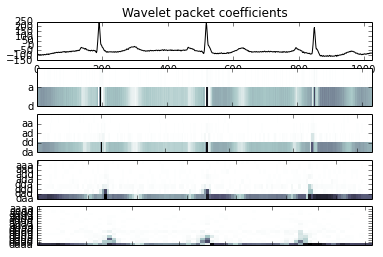

In [4]:
#wp_visualize_coeffs_distribution.py

import numpy
import pylab
%matplotlib inline
from pywt import WaveletPacket

x = numpy.arange(612 - 80, 20, -0.5) / 150.
# data = numpy.sin(20 * pylab.log(x)) * numpy.sign((pylab.log(x)))
data = ecg
wp = WaveletPacket(ecg, 'sym5', maxlevel=4)

pylab.bone()
pylab.subplot(wp.maxlevel + 1, 1, 1)
pylab.plot(data, 'k')
pylab.xlim(0, len(data) - 1)
pylab.title("Wavelet packet coefficients")

for i in range(1, wp.maxlevel + 1):
    ax = pylab.subplot(wp.maxlevel + 1, 1, i + 1)
    nodes = wp.get_level(i, "freq")
    nodes.reverse()
    labels = [n.path for n in nodes]
    values = -abs(numpy.array([n.data for n in nodes]))
    pylab.imshow(values, interpolation='nearest', aspect='auto')
    pylab.yticks(numpy.arange(len(labels) - 0.5, -0.5, -1), labels)
    pylab.setp(ax.get_xticklabels(), visible=False)

pylab.show()

Signal decomposition (S = An + Dn + Dn-1 + ... + D1)
DWT: Signal irregularity
DWT: Frequency and phase change - Symmlets5
DWT: Ecg sample - Symmlets5


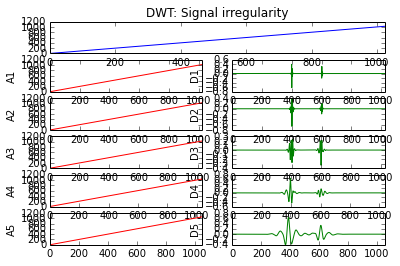

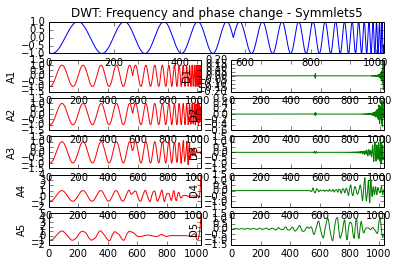

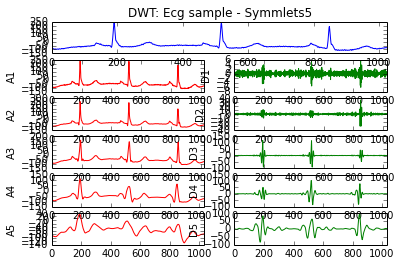

In [5]:
#dwt_signal_decomposition.py
import pylab
import pywt

data1 = pylab.array(range(1, 400) + range(398, 600) + range(601, 1024))
x = pylab.arange(612 - 80, 20, -0.5) / 250.
data2 = pylab.sin(40 * pylab.log(x)) * pylab.sign((pylab.log(x)))

data3 = ecg
mode = pywt.MODES.sp1

def plot(data, w, title):
    print title
    w = pywt.Wavelet(w)
    a = data
    ca = []
    cd = []
    for i in xrange(5):
        (a, d) = pywt.dwt(a, w, mode)
        ca.append(a)
        cd.append(d)

    rec_a = []
    rec_d = []

    for i, coeff in enumerate(ca):
        coeff_list = [coeff, None] + [None] * i
        rec_a.append(pywt.waverec(coeff_list, w))

    for i, coeff in enumerate(cd):
        coeff_list = [None, coeff] + [None] * i
        rec_d.append(pywt.waverec(coeff_list, w))

    pylab.figure()
    ax_main = pylab.subplot(len(rec_a) + 1, 1, 1)
    pylab.title(title)
    ax_main.plot(data)
    pylab.xlim(0, len(data) - 1)

    for i, y in enumerate(rec_a):
        #print len(data), len(x), len(data) / (2**(i+1))
        ax = pylab.subplot(len(rec_a) + 1, 2, 3 + i * 2)
        ax.plot(y, 'r')
        pylab.xlim(0, len(y) - 1)
        pylab.ylabel("A%d" % (i + 1))

    for i, y in enumerate(rec_d):
        ax = pylab.subplot(len(rec_d) + 1, 2, 4 + i * 2)
        ax.plot(y, 'g')
        pylab.xlim(0, len(y) - 1)
        #pylab.ylim(min(0,1.4*min(x)), max(0,1.4*max(x)))
        pylab.ylabel("D%d" % (i + 1))


print "Signal decomposition (S = An + Dn + Dn-1 + ... + D1)"
plot(data1, 'coif5', "DWT: Signal irregularity")
plot(data2, 'sym5', "DWT: Frequency and phase change - Symmlets5")
plot(data3, 'sym5', "DWT: Ecg sample - Symmlets5")
pylab.show()


In [15]:
from pywt import WaveletPacket

wp = WaveletPacket(range(16), 'db5', maxlevel=4)
#print [node.path for node in wp.get_leaf_nodes(decompose=False)]
print [node.path for node in wp.get_leaf_nodes(decompose=True)]
coeffs = [(node.path, node.data) for node in wp.get_leaf_nodes(decompose=True)]
#print coeffs

wp2 = WaveletPacket(None, 'db5', maxlevel=4)
for path, data in coeffs:
    wp2[path] = data
#print wp["a"]
#print [node.path for node in wp2.get_leaf_nodes(decompose=False)]
#print wp2.reconstruct()

['aaaa', 'aaad', 'aada', 'aadd', 'adaa', 'adad', 'adda', 'addd', 'daaa', 'daad', 'dada', 'dadd', 'ddaa', 'ddad', 'ddda', 'dddd']
